In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df=pd.read_csv('train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
df.shape

(891, 12)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test=pd.read_csv('test.csv')

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
orignal_train=df.copy()
orignal_test=test.copy()

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# hypothesis
""" 1. more women survived.
    2. more fare more survived
    3. age vs survival
    4. higher class high survival
    5. cabin (letter) vs Pclass
"""

' 1. more women survived.\n    2. more fare more survived\n    3. age vs survival\n    4. higher class high survival\n    5. cabin (letter) vs Pclass\n'

In [17]:
#target variable
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

# Categorical and ordinal independent variables

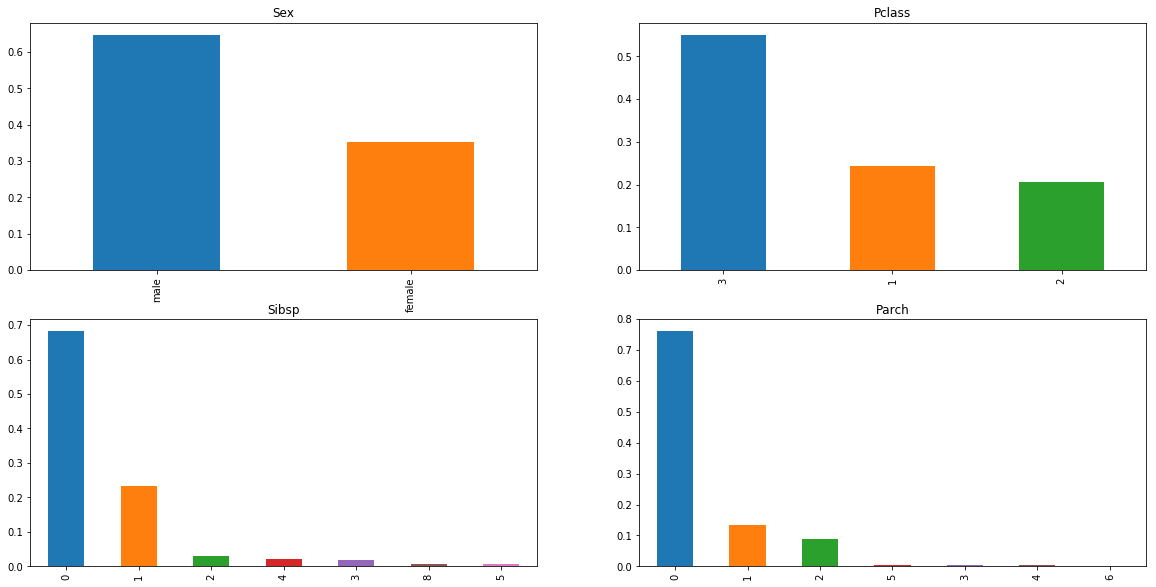

In [18]:
plt.figure(1)
plt.subplot(221)
df['Sex'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Sex')

plt.subplot(222)
df['Pclass'].value_counts(normalize=True).plot.bar(title= 'Pclass')

plt.subplot(223)
df['SibSp'].value_counts(normalize=True).plot.bar(title= 'Sibsp')

plt.subplot(224)
df['Parch'].value_counts(normalize=True).plot.bar(title= 'Parch')



plt.show()


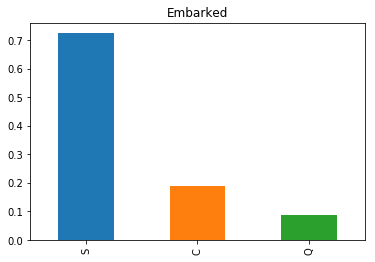

In [19]:

df['Embarked'].value_counts(normalize=True).plot.bar(title= 'Embarked')

In [20]:
df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [21]:
df['Pclass'].value_counts(normalize=True,ascending=True)

2    0.206510
1    0.242424
3    0.551066
Name: Pclass, dtype: float64

In [22]:
df['SibSp'].value_counts(normalize=True,ascending=True)

5    0.005612
8    0.007856
3    0.017957
4    0.020202
2    0.031425
1    0.234568
0    0.682379
Name: SibSp, dtype: float64

In [23]:
df['Parch'].value_counts(normalize=True,ascending=True)

6    0.001122
4    0.004489
3    0.005612
5    0.005612
2    0.089787
1    0.132435
0    0.760943
Name: Parch, dtype: float64

In [24]:
df['Embarked'].value_counts(normalize=True,ascending=True)

Q    0.086614
C    0.188976
S    0.724409
Name: Embarked, dtype: float64

# independent numerical features

C:\Users\1180s\Documents\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


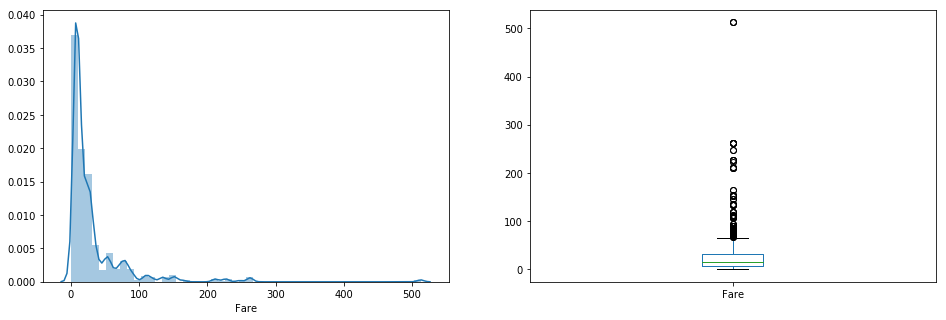

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Fare']);

plt.subplot(122)
df['Fare'].plot.box(figsize=(16,5))

plt.show()

In [26]:
#age graph not there as lots of missing values


Text(0.5, 0.98, '')

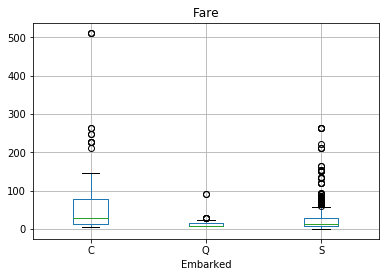

In [27]:
df.boxplot(column='Fare', by = 'Embarked')
plt.suptitle("")

Text(0.5, 0.98, '')

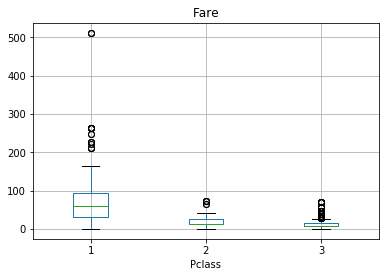

In [28]:
df.boxplot(column='Fare', by = 'Pclass')
plt.suptitle("")

# bivariate analysis

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


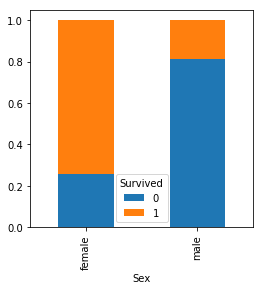

In [29]:
Gender=pd.crosstab(df['Sex'],df['Survived'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))\

Gender.div(Gender.sum(1).astype(float), axis=0)


it shows that female survival was more than that of male

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


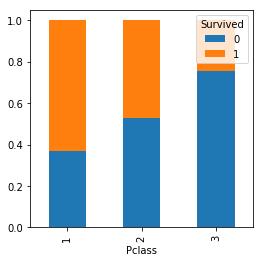

In [30]:
Pclass=pd.crosstab(df['Pclass'],df['Survived'])
Pclass.div(Pclass.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))\

Pclass.div(Pclass.sum(1).astype(float), axis=0)


it shows that class 1> class2> class3 , in survival rate

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


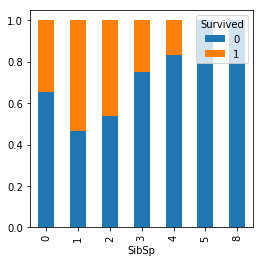

In [31]:
Sibsp=pd.crosstab(df['SibSp'],df['Survived'])
Sibsp.div(Sibsp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))\

Sibsp.div(Sibsp.sum(1).astype(float), axis=0)

cant say much

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


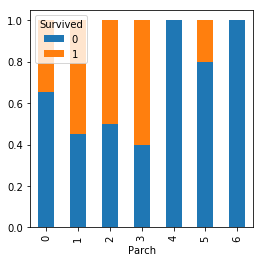

In [32]:
Parch=pd.crosstab(df['Parch'],df['Survived'])
Parch.div(Parch.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))\

Parch.div(Parch.sum(1).astype(float), axis=0)


cant say much

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


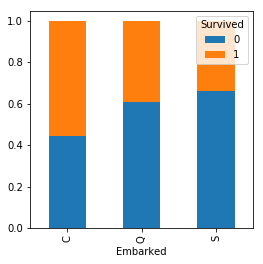

In [33]:
embarked=pd.crosstab(df['Embarked'],df['Survived'])
embarked.div(embarked.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))\

embarked.div(embarked.sum(1).astype(float), axis=0)

not strong enough but still, c> q> s surrival rate

In [34]:
df.groupby('Survived')['Fare'].mean()


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

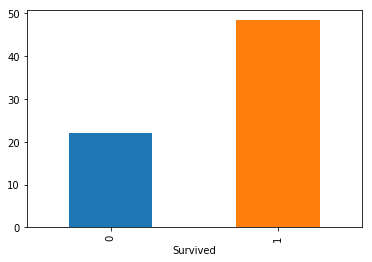

In [35]:
df.groupby('Survived')['Fare'].mean().plot.bar()

Survived people had more fair 

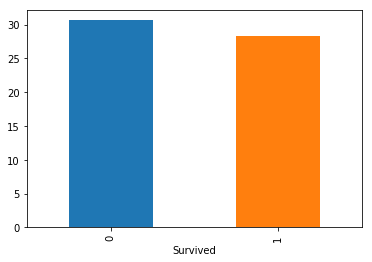

In [36]:
df.groupby('Survived')['Age'].mean().plot.bar()

In [37]:
bins=[0,5,15,25,50,100]
group=['baby','child','Adult','mature','old']
df['age_bin']=pd.cut(df['Age'],bins,labels=group)

In [38]:
df['age_bin'].value_counts(normalize=True)

mature    0.488796
Adult     0.305322
old       0.089636
baby      0.061625
child     0.054622
Name: age_bin, dtype: float64

Survived,0,1
age_bin,,
baby,0.295455,0.704545
child,0.538462,0.461538
Adult,0.655963,0.344037
mature,0.587393,0.412607
old,0.656250,0.343750


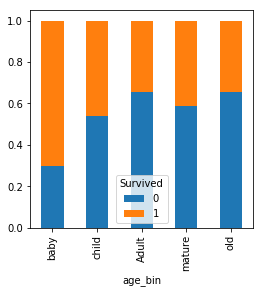

In [39]:
age=pd.crosstab(df['age_bin'],df['Survived'])
age.div(age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))\

age.div(age.sum(1).astype(float), axis=0)

children more saved , elderly people died ..

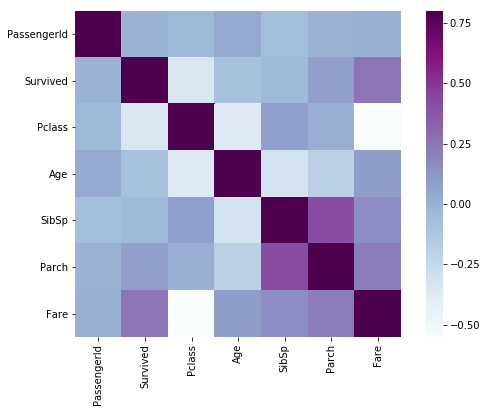

In [40]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

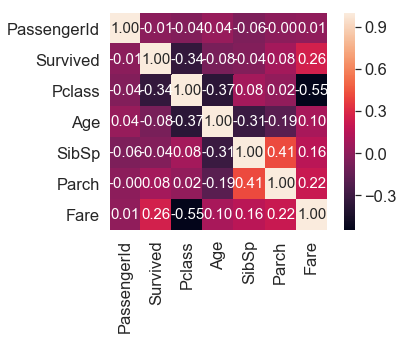

In [41]:
#cm=np.corrcoef(df.valuesT)
sns.set(font_scale=1.5)
hm=sns.heatmap(matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15})

# missing value tratment and new features

In [42]:
df['Age'].fillna(df['Age'].median(), inplace = True)

    #complete embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
df['Fare'].fillna(df['Fare'].median(), inplace = True)

In [43]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test['Age'].fillna(test['Age'].median(), inplace = True)

    #complete embarked with mode
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
age_bin        177
dtype: int64

In [46]:
df=df.drop(['age_bin'], axis=1)

In [47]:
df['Cabin'].fillna(0,inplace=True)



In [48]:
test['Cabin'].fillna(0,inplace=True)

In [49]:
##cabin feature
df['Has_Cabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == int else 1)



In [50]:
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == int else 1)


In [51]:
##engineer the family size feature

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [52]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [53]:
# Create new feature IsAlone from FamilySize

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [54]:
test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [55]:
# Get titles from the names
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [56]:
# Get titles from the names
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [57]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [58]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [59]:
## Create new column "FamilySizeGroup" and assign "Alone", "Small" and "Big"
df['FamilySizeGroup'] = 'Small'
df.loc[df['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
df.loc[df['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Big'

In [60]:
test['FamilySizeGroup'] = 'Small'
test.loc[test['FamilySize'] == 1, 'FamilySizeGroup'] = 'Alone'
test.loc[test['FamilySize'] >= 5, 'FamilySizeGroup'] = 'Big'

In [61]:
# engineer a new  features

df['IsChildandRich'] = 0
df.loc[(df['Age'] <= 10) & (df['Pclass'] == 1 ),'IsChildandRich'] = 1  
df.loc[(df['Age'] <= 10) & (df['Pclass'] == 2 ),'IsChildandRich'] = 1  
    

In [62]:

test['IsChildandRich'] = 0
test.loc[(test['Age'] <= 10) & (test['Pclass'] == 1 ),'IsChildandRich'] = 1  
test.loc[(test['Age'] <= 10) & (test['Pclass'] == 2 ),'IsChildandRich'] = 1  

In [63]:

df['IsWomenandRich'] = 0
df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 1 ),'IsWomenandRich'] = 1  
df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 2 ),'IsWomenandRich'] = 1  

In [64]:
test['IsWomenandRich'] = 0
test.loc[(test['Sex'] == 'female') & (test['Pclass'] == 1 ),'IsWomenandRich'] = 1  
test.loc[(test['Sex'] == 'female') & (test['Pclass'] == 2 ),'IsWomenandRich'] = 1  

In [65]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Has_Cabin          0
FamilySize         0
IsAlone            0
Title              0
FamilySizeGroup    0
IsChildandRich     0
IsWomenandRich     0
dtype: int64

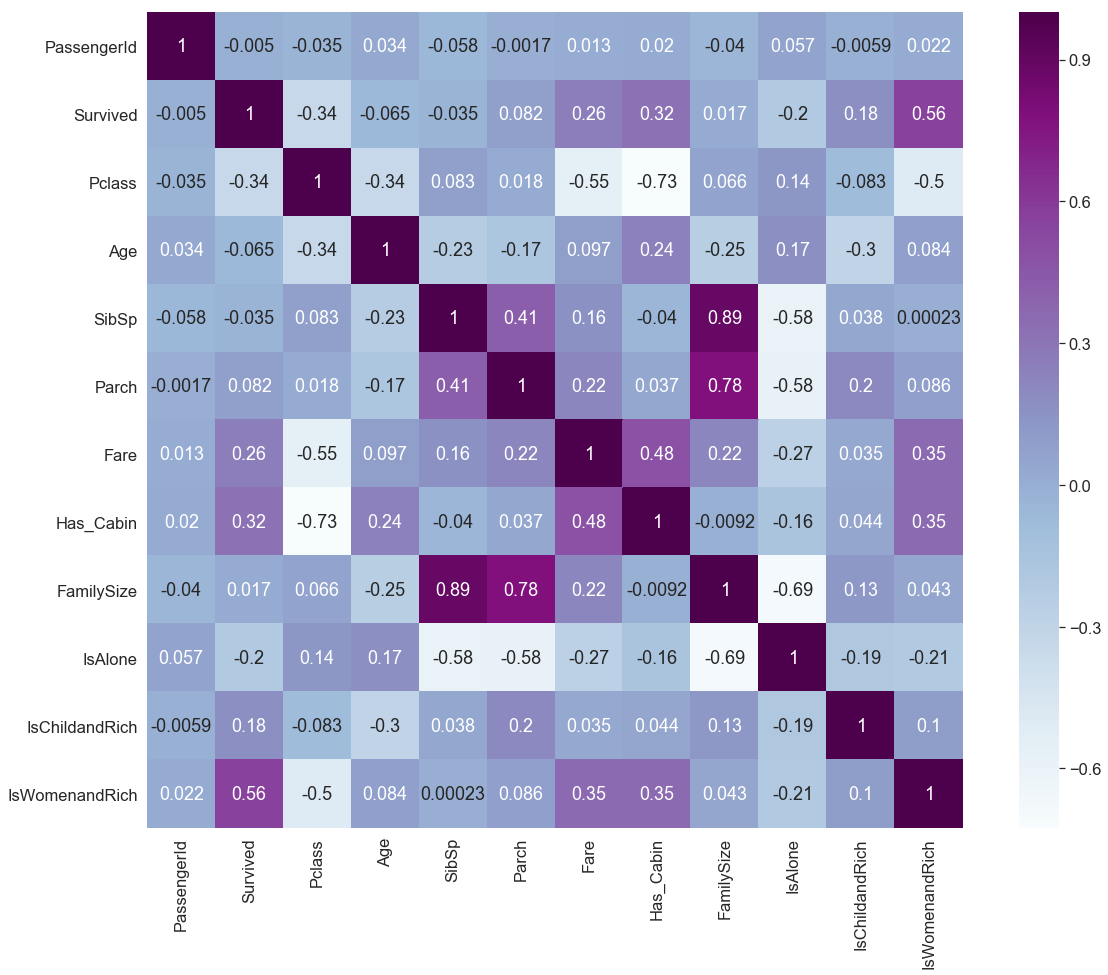

In [66]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu",annot=True);

In [67]:
bins=[0,10,25,50,100]
group=[1,2,3,4]
df['age_bin']=pd.cut(df['Age'],bins,labels=group)

In [68]:
test['age_bin']=pd.cut(test['Age'],bins,labels=group)
test['age_bin']=pd.to_numeric(test['age_bin'])

In [69]:
df['age_bin'].value_counts(normalize=True)

3    0.590348
2    0.265993
4    0.071829
1    0.071829
Name: age_bin, dtype: float64

In [70]:
df['age_bin']=pd.to_numeric(df['age_bin'])

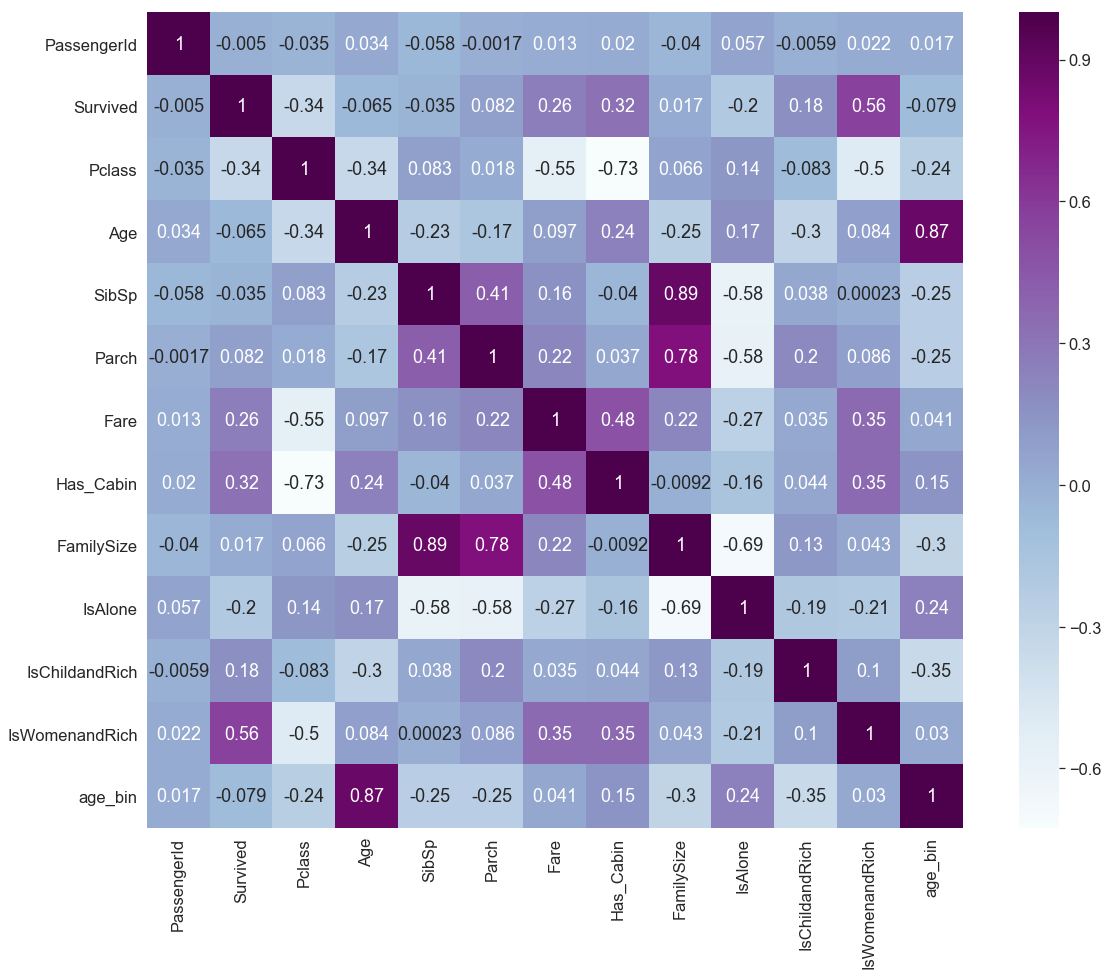

In [71]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu",annot=True);

In [72]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
 

In [73]:
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [74]:
# map the new features
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
family_mapping = {"Small": 0, "Alone": 1, "Big": 2}

df['Title'] = df['Title'].map(title_mapping)
df['FamilySizeGroup'] = df['FamilySizeGroup'].map(family_mapping)

In [75]:
test['Title'] = test['Title'].map(title_mapping)
test['FamilySizeGroup'] = test['FamilySizeGroup'].map(family_mapping)

In [76]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Has_Cabin',
       'FamilySize', 'IsAlone', 'Title', 'FamilySizeGroup', 'IsChildandRich',
       'IsWomenandRich', 'age_bin'],
      dtype='object')

In [77]:
del df['Name']

In [78]:
del test['Name']

In [79]:
del df['PassengerId']

In [80]:
del test['PassengerId']

In [81]:
del df['SibSp']

In [82]:
del df['Parch']

In [83]:
del df['Ticket']

In [84]:
del df['Cabin']

In [85]:
del df['FamilySize']

In [86]:
del df['Age']

In [87]:
del test['SibSp']
del test['Parch']
del test['Ticket']
del test['Cabin']
del test['FamilySize']
del test['Age']

In [88]:
df['Port'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [89]:
test['Port'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [90]:
del df['Embarked']

In [91]:
del test['Embarked']

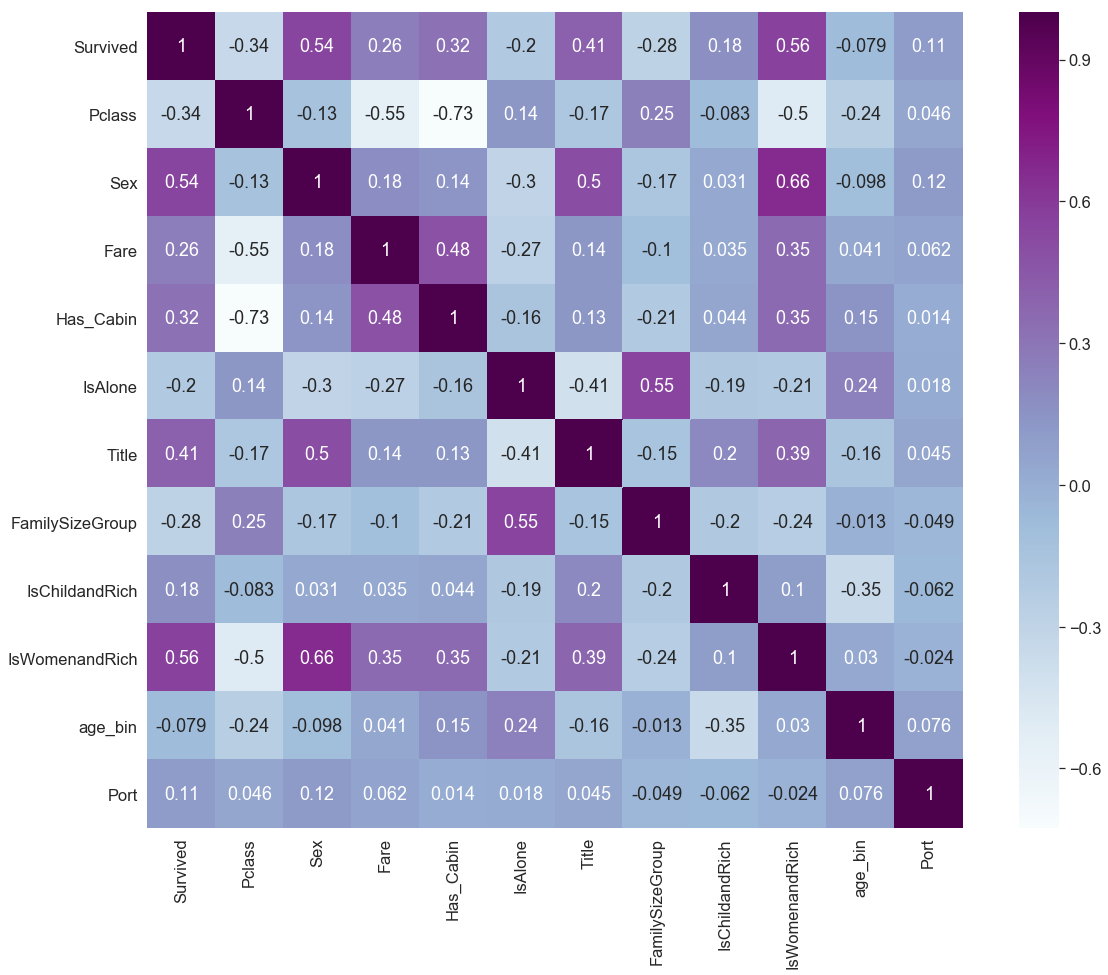

In [92]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu",annot=True);

In [93]:
df.shape

(891, 12)

In [94]:
X_train = df.drop("Survived",axis=1)
Y_train = df["Survived"]
X_train.shape

(891, 11)

In [95]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Has_Cabin', 'IsAlone', 'Title',
       'FamilySizeGroup', 'IsChildandRich', 'IsWomenandRich', 'age_bin',
       'Port'],
      dtype='object')

In [ ]:
test.columns

In [97]:
X_train.head()

,Pclass,Sex,Fare,Has_Cabin,IsAlone,Title,FamilySizeGroup,IsChildandRich,IsWomenandRich,age_bin,Port
0,3,0,7.2500,0,0,1,0,0,0,2,0
1,1,1,71.2833,1,0,3,0,0,1,3,1
2,3,1,7.9250,0,1,2,1,0,0,3,0
3,1,1,53.1000,1,0,3,0,0,1,3,0
4,3,0,8.0500,0,1,1,1,0,0,3,0


# Logistic regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
from sklearn.model_selection import cross_val_score

In [102]:
model = LogisticRegression()

In [103]:
scores=cross_val_score(estimator=model,X=X_train,y=Y_train,cv=10,n_jobs=-1)

In [104]:
scores

array([0.78888889, 0.84444444, 0.78651685, 0.86516854, 0.84269663,
       0.80898876, 0.85393258, 0.80898876, 0.83146067, 0.85227273])

In [105]:
np.mean(scores)

0.8283358869594825

In [106]:
model.fit(X_train, Y_train)

C:\Users\1180s\Documents\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
pred = model.predict(test)

In [108]:
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [109]:
 pred1= pd.Series(pred)
 pred1.rename('Survived')   ;


In [137]:
soln=pd.read_csv('soln.csv')

In [138]:
soln

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [112]:
del soln['Survived']

In [114]:
soln;

In [288]:
soln.rename(columns={'PassengerId': 'PassengerId', 'survived': 'Survived'}, inplace=True)


In [289]:
soln.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [290]:
soln.to_csv('solution.csv')

In [122]:
X_train.shape

(891, 11)

# Tree and knn and random forest

In [119]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

#X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
#random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, Y_train)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [117]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
scores=cross_val_score(estimator=model,X=X_train,y=Y_train,cv=10,n_jobs=-1)

In [123]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,11)}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [124]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 6}

In [125]:
tree_grid.best_score_

0.8282828282828283

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

knn_grid.fit(X_train, Y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.8s finished
C:\Users\1180s\Documents\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1180s\Documents\anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


({'knn__n_neighbors': 4}, 0.8271604938271605)

In [129]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
print(np.mean(cross_val_score(forest, X_train, Y_train, cv=5)))

0.819400578838047


In [130]:
forest_params = {'max_depth': range(1,11),
'max_features': range(4,11)}

forest_grid = GridSearchCV(forest, forest_params,
                        cv=10, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, Y_train)

forest_grid.best_params_, forest_grid.best_score_ 

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   21.7s finished


({'max_depth': 8, 'max_features': 6}, 0.8395061728395061)

In [131]:
 forest_solution=forest_grid.predict(test) 

In [133]:
forest_solution.shape

(418,)

In [134]:
knn_soln=knn_grid.predict(test)

C:\Users\1180s\Documents\anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [135]:
tree_soln=tree_grid.predict(test)

In [136]:
forest_solution.to_excel('forest.xlsx')

AttributeError: 'numpy.ndarray' object has no attribute 'to_excel'